# TP Laboratorio de implementación II

# Trabajo Práctico Final

# Consigna 1: Modelo de predicción de inmuebles

### *Alumnos:* Gibertini Lopez de Maturana Jorgelina; Santamaria Bonamico Irina; Scheli Layla; Quintero Juan Franciso y Viera Arnaldo

*Consigna:*

*1.	Armar un dataset con propiedades a la venta.*

*2.	Analizar el dataset y extraer información e insights relevantes.*

*3.	Armar un modelo predictivo para predecir el valor de venta de los inmuebles.*

*4.	Presentar y comunicar los insights*.



# Desarrollo

El objetivo del presente trabajo consiste en la construccion de un modelo para predecir el valor de venta de los inmuebles ubicados en la ciudad de Rosario. 

El dataset a utilizar estará compuesto por publicaciones de cocheras, casas y departamentos en venta de la plataforma de e-commerce MercadoLibre.

# Parte 1 - Armado del dataset de inmuebles en la ciudad de Rosario

La primera etapa del análisis consistió en el armado del dataset. 

Para ello, se accedió a la API pública de Mercado Libre, desde la cual se visualizaron todas las publicaciones de venta de inmuebles.

<img src=https://assets.entrepreneur.com/images/misc/1584487204_LOGOCODOS_fondoblanco-01.png>

In [1]:
import requests 
import json 
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

Luego se definió una función que permitió acceder a la información de la dirección del sitio web que vamos a usar (URL).

In [3]:
def get_response(url):
    try:
        response = requests.get(url, timeout=3)
        response.raise_for_status()
        return response
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)

Para responder las consignas del trabajo práctico se definió como área de cobertura la ciudad de Rosario. 

Desde la API pública de Mercado Libre puede obtenerse información en real-time de las primeras mil publicaciones, por lo cual se construyeron polígonos de diferentes dimensiones, con sus correspondientes latitudes y longitudes, que representaron diferentes zonas de la ciudad, tratando de abarcar toda el área de cobertura. En el siguiente mapa se puede visualizar cada una de las áreas bajo estudio: https://www.google.com/maps/d/edit?mid=1MHaRRb-eueaA_3yGywHA-wrNA7sFpR6Z&usp=sharing.

El interés radicó en indagar sobre aquellos inmuebles categorizados como "departamentos, "casas" y "cocheras" que estén a la venta en las publicaciones de Mercado Libre. 

Un primer paso fue ir llamando a los primeros 1050 registros de ciertas áreas geográficas de cada una de las categorías a estudiar (*Casas, Cocheras y Departamentos*), comprendiendo para cada una las mil publicaciones autorizadas desde la API pública y un offset de 50. 

## Casas

La categoría *Casas* se dividió en dos zonas, de acuerdo a la disponibilidad de datos del sitio web.

### Casas, área 1


In [4]:
offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.94_-32.89,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_casas = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.94_-32.89,lon:-60.771_-60.618&category=MLA401685&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_casas.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_casas)

Encontramos 1326 resultados para nuestra consulta


1050

### Casas, área 2

In [5]:
# CASAS 2

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.95,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_casas2= []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.95,lon:-60.771_-60.618&category=MLA401685&limit=50&offset=0#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_casas2.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_casas2)

Encontramos 1091 resultados para nuestra consulta


1050

Se controlaron las publicaciones repetidas, 

In [6]:
print(len(item_list_casas))
print(len(set(item_list_casas)))

1050
1050


Oteniéndose un total de 2100 publicaciones de venta dentro de la categoría *Casas*. 

## Departamentos

Para la busqueda de departamentos se realizaron un total de 8 corridas. 4 correponden a "Zonas Centro" y el resto corresponde a: "Zona Sur", "Zona Macrocentro", "Zona Norte" y "Zona Suroeste".

### Departamentos Zona Centro

#### Departamentos Zona Centro, área 1

In [7]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000

item_list_deptos1a = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1a.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1a)

Encontramos 4337 resultados para nuestra consulta


1049

#### Departamentos Zona Centro, área 2

In [8]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1b = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.64141_-60.62012&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1b.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1b)

Encontramos 1147 resultados para nuestra consulta


1050

#### Departamentos Zona Centro, área 3

In [9]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1c = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.96164_-32.94579,lon:-60.66146_-60.64312&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1c.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1c)

Encontramos 5581 resultados para nuestra consulta


1050

#### Departamentos Zona Centro, área 4

In [10]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonadentr!
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url)
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos1d = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.9446_-32.9228,lon:-60.63956_-60.61964&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos1d.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos1d)

Encontramos 733 resultados para nuestra consulta


733

### Departamentos Zona Sur

In [11]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales / zonasur!
offset=0

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url)
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000


item_list_deptos2 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.963,lon:-60.657_-60.618&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos2.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos2)

Encontramos 1786 resultados para nuestra consulta


1050

### Departamentos Zona Macrocentro

In [12]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0 

offset=0
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_deptos3 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.95348_-32.922294,lon:-60.73433_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos3.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos3)

Encontramos 4362 resultados para nuestra consulta


1050

### Departamentos Zona Norte

In [13]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))


maximum=1000

item_list_deptos4 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-32.92011_-32.86057,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos4.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos4)

Encontramos 533 resultados para nuestra consulta


533

In [14]:
print(len(item_list_deptos4))
print(len(set(item_list_deptos4)))

533
533


### Departamentos Zona Suroeste


In [15]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json' #inmueble / deptos  / venta / propiedades individuales 
offset=0 

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_deptos5 = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01295_-32.95823,lon:-60.73368_-60.66584&category=MLA401686&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_deptos5.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_deptos5)

Encontramos 372 resultados para nuestra consulta


372

## Cocheras

In [16]:
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset=0#json' #inmueble / cocheras  / venta

offset=0 
url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset=0#json'.format(offset)
r = get_response(url) 
maximum = int(str(r.json()["paging"]["total"])) 

print('Encontramos {} resultados para nuestra consulta'.format(maximum))

maximum=1000

item_list_cocheras = []
while r.status_code == 200 and offset <= maximum:
    url='https://api.mercadolibre.com/sites/MLA/search?item_location=lat:-33.01_-32.90,lon:-60.771_-60.618&category=MLA50543&limit=50&offset={}#json'.format(offset)
    r = get_response(url)
    data = r.json()
    length = len(data['results'])
    for i in range(length):
        item_id = data['results'][i]['id']
        item_list_cocheras.append(item_id)
    print("Porcentaje de completitud: {:0.2%}".format(offset/maximum),end='\r')
    offset += 50
        
len(item_list_cocheras)

Encontramos 1745 resultados para nuestra consulta


1050

Se unificaron todas las busquedas en una sola lista (item_list). 

In [17]:
item_list = []
item_list.extend(item_list_casas)
item_list.extend(item_list_casas2)
item_list.extend(item_list_cocheras)
item_list.extend(item_list_deptos1a)  
item_list.extend(item_list_deptos1b)  
item_list.extend(item_list_deptos1c)  
item_list.extend(item_list_deptos1d)  
item_list.extend(item_list_deptos2)  
item_list.extend(item_list_deptos3)  
item_list.extend(item_list_deptos4)  
item_list.extend(item_list_deptos5)  

len (item_list) 

10037

In [18]:
print(len(item_list))
print(len(set(item_list)))

10037
8315


In [19]:
item_list2 = (set(item_list))

In [21]:
item_list2= list(item_list2)
item_list=item_list2

Se observó una baja proporción de publicaciones repetidas.

In [23]:
final_list = []
for i in range(len(item_list)):
    item="https://api.mercadolibre.com/items/{}".format(item_list[i])
    item_add = requests.get(item)
    item_add = item_add.json()
    final_list.append(item_add)
    print("Porcentaje de completitud: {:0.2%}".format((i+1)/len(item_list)),end='\r')

Se exploraron las llaves que tiene el archivo, con el objetivo de conocer la información disponible para el armado del dataset.

In [24]:
final_list[0].keys()

dict_keys(['id', 'site_id', 'title', 'subtitle', 'seller_id', 'category_id', 'official_store_id', 'price', 'base_price', 'original_price', 'currency_id', 'initial_quantity', 'available_quantity', 'sold_quantity', 'sale_terms', 'buying_mode', 'listing_type_id', 'start_time', 'stop_time', 'condition', 'permalink', 'thumbnail_id', 'thumbnail', 'secure_thumbnail', 'pictures', 'video_id', 'descriptions', 'accepts_mercadopago', 'non_mercado_pago_payment_methods', 'shipping', 'international_delivery_mode', 'seller_address', 'seller_contact', 'location', 'coverage_areas', 'attributes', 'warnings', 'listing_source', 'variations', 'status', 'sub_status', 'tags', 'warranty', 'catalog_product_id', 'domain_id', 'parent_item_id', 'differential_pricing', 'deal_ids', 'automatic_relist', 'date_created', 'last_updated', 'health', 'catalog_listing', 'channels'])

Se validó luego el recuento inicial, tomando nota del volumen inicial de elementos con los que vamos a trabajar.

In [25]:
recuento_inicial=len(final_list)
recuento_inicial

8315

Se transformaron los datos a una base *json*.

In [26]:
data=pd.json_normalize(final_list)

Se definió una función para traer los elementos considerados de interés para el armado del dataset.

In [27]:
def traerdato(elemento,rama,subrama,valor='value_name'):
    indices=[]
    for i,s in enumerate(elemento[rama]):
        for j in s:
            if subrama in str(s[j]):
                indices.append([i,s])
    if len(indices) ==0:
        return ''
    else:
        return indices[0][1][valor]

Posteriormente, se procedió al análisis de la información que el dataset debería contener. Dentro de la llave "attributes" se encontró gran cantidad de informacion, por lo cual se seleccionaron aquellos atributos considerados de interés.

Para esto se realizó un análisis de negocio, es decir, se evaluaron qué aspectos resultan relevantes para la venta de las distintas propiedades.

In [28]:
elementos_a_sumar = ['COVERED_AREA','TOTAL_AREA', 'FULL_BATHROOMS', 'BEDROOMS', 'HAS_SWIMMING_POOL', 'HAS_GRILL', 
'HAS_STUDY','HAS_HEATING','HAS_NATURAL_GAS','FACING','HAS_BALCONY','HAS_DRESSING_ROOM','HAS_GARDEN','HAS_HALF_BATH',
'HAS_MAID_ROOM','HAS_PATIO','HAS_PLAYROOM','HAS_TERRACE','PROFESSIONAL_USE_ALLOWED','SUITABLE_FOR_MORTGAGE_LOAN',
'HAS_SECURITY','FLOORS', 'PROPERTY_AGE','ROOMS','HAS_LAUNDRY','COVERED_AREA','TOTAL_AREA']


Se creó una función por la cual se almacenó en un diccionario, para cada elemento, la informacion contenida en los atributos definidos en la lista anterior.

In [29]:
diccionario = {}
for columna in elementos_a_sumar:
    diccionario[columna] = np.NaN
    lista = []
    for elemento in final_list:
        lista.append(traerdato(elemento,'attributes',columna))
    diccionario[columna] = pd.Series(lista)

In [30]:
data1 = pd.DataFrame(diccionario)

Se unió el diccionario con la base de datos.

In [31]:
data2=pd.concat([data,data1],axis=1)

# Parte 2 - Analizar el dataset y extraer información e insights relevantes

El primer paso para analizar la base de datos consistió en la eliminación de aquella información que no resultó significante según el objeto de análisis, o que, por las propias características, se dedujo que trajo información no confiable, incompleta, etc. y en consecuencia no aportaba validez al dataset.

In [32]:
data2=data2.drop(
    ["base_price","subtitle","site_id","original_price","initial_quantity","available_quantity","sold_quantity",
     "sale_terms","buying_mode","thumbnail_id","thumbnail","secure_thumbnail","descriptions","accepts_mercadopago",
    "non_mercado_pago_payment_methods","international_delivery_mode","coverage_areas","attributes","warnings","listing_source",
    "variations","status","sub_status","warranty","catalog_product_id","domain_id","differential_pricing","deal_ids",
    "automatic_relist","health","catalog_listing","shipping.mode","shipping.methods","shipping.tags","shipping.dimensions",
    "shipping.free_shipping","shipping.logistic_type","shipping.store_pick_up","seller_address.city.id","seller_address.country.id",
    "seller_address.country.name","seller_address.search_location.city.id","seller_address.search_location.state.id",
    "seller_address.search_location.state.name","seller_contact.contact","seller_contact.other_info","seller_contact.country_code",
    "seller_contact.area_code","seller_contact.phone","seller_contact.country_code2","seller_contact.area_code2",
    "seller_contact.phone2","seller_contact.email","seller_contact.webpage","location.neighborhood.id","location.city.id",
    "location.state.id","location.state.name","location.country.id", "official_store_id", "video_id", "parent_item_id",
    "seller_address.search_location.neighborhood.id","channels","shipping.local_pick_up","seller_address.city.name","seller_address.state.id",
    "seller_address.state.name","seller_address.search_location.city.name","seller_address.id","location.zip_code","location.city.name","location.country.name"],
    axis=1)

Realizando un análisis más exhaustivo, se observaron los nombres de los atributos, así como el tipo de variables y la existencia de missings (datos faltantes).

In [33]:
data2.columns

Index(['id', 'title', 'seller_id', 'category_id', 'price', 'currency_id',
       'listing_type_id', 'start_time', 'stop_time', 'condition', 'permalink',
       'pictures', 'tags', 'date_created', 'last_updated',
       'location.address_line', 'location.neighborhood.name',
       'seller_address.search_location.neighborhood.name', 'COVERED_AREA',
       'TOTAL_AREA', 'FULL_BATHROOMS', 'BEDROOMS', 'HAS_SWIMMING_POOL',
       'HAS_GRILL', 'HAS_STUDY', 'HAS_HEATING', 'HAS_NATURAL_GAS', 'FACING',
       'HAS_BALCONY', 'HAS_DRESSING_ROOM', 'HAS_GARDEN', 'HAS_HALF_BATH',
       'HAS_MAID_ROOM', 'HAS_PATIO', 'HAS_PLAYROOM', 'HAS_TERRACE',
       'PROFESSIONAL_USE_ALLOWED', 'SUITABLE_FOR_MORTGAGE_LOAN',
       'HAS_SECURITY', 'FLOORS', 'PROPERTY_AGE', 'ROOMS', 'HAS_LAUNDRY'],
      dtype='object')

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315 entries, 0 to 8314
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id                                                8315 non-null   object 
 1   title                                             8315 non-null   object 
 2   seller_id                                         8315 non-null   int64  
 3   category_id                                       8315 non-null   object 
 4   price                                             8315 non-null   float64
 5   currency_id                                       8315 non-null   object 
 6   listing_type_id                                   8315 non-null   object 
 7   start_time                                        8315 non-null   object 
 8   stop_time                                         8315 non-null   object 
 9   condition          

Salvo *SELLER_ID* (**integer**) y *PRICE* (**float**), el resto de las variables son de tipo **object**.

Por tal motivo, se transformaron en numéricas las variables *PROPERTY_AGE, COVERED_AREA, TOTAL_AREA, FULL_BATHROOMS, BEDROOMS, FLOOR,* y *ROOMS*. Esta decisión se basó en el hecho de que dichas variables reflejan efectivamente cantidades (antigüedad de la propiedad en cantidad de años, área cubierta en cantidad de metros cuadrados, etc.), por lo cual es importante que en el dataset aparezcan como numéricas.

In [35]:
data2['PROPERTY_AGE']=data2['PROPERTY_AGE'].replace({" años":""},regex=True)
data2['PROPERTY_AGE']=pd.to_numeric(data2['PROPERTY_AGE'])
data2['COVERED_AREA']=data2['COVERED_AREA'].replace({" m²":""},regex=True)
data2['COVERED_AREA']=data2['COVERED_AREA'].replace({" ha":""},regex=True)
data2['TOTAL_AREA']=data2['TOTAL_AREA'].replace({" m²":""},regex=True)
data2['TOTAL_AREA']=data2['TOTAL_AREA'].replace({" ha":""},regex=True)
data2['COVERED_AREA']=pd.to_numeric(data2['COVERED_AREA'])
data2['TOTAL_AREA']=pd.to_numeric(data2['TOTAL_AREA'])
data2['FULL_BATHROOMS']=pd.to_numeric(data2['FULL_BATHROOMS'])
data2['BEDROOMS']=pd.to_numeric(data2['BEDROOMS'])
data2['FLOORS']=pd.to_numeric(data2['FLOORS']) 
data2['ROOMS']=pd.to_numeric(data2['ROOMS'])

Luego de un análisis en profundidad del dataset, se tomaron diferentes criterios de decisión sobre algunas variables por diferentes razones.

A continuación se justificarán las mismas.

## Criterio 1: No se incluirán en el análisis aquellos inmuebles sin superficie

Como no tiene sentido un inmueble sin superficie, se eliminaron del dataset aquellas publicaciones con un área = 0. 

In [39]:
data2 = data2.drop(data2[data2['TOTAL_AREA']==0].index)

## Criterio 2: No se incluirán aquellos inmuebles con precio de venta en pesos

En el contexto argentino actual, con elevadas tasas de inflación, es una práctica ampliamente adoptada la fijación de los precios de venta de las propiedades en dólares. Es por ello que se eliminaron aquellas propiedades con precios de venta en pesos, para poder trabajar con una base de datos que posea una unidad de medida monetaria homogénea, más estable, y ampliamente utilizada.

In [40]:
data2 = data2.drop(data2[data2["currency_id"]=="ARS"].index)

## Criterio 3: Se eliminaron aquellos inmuebles cuyo precio figura como "1111", "11111" y "111111"


En general, cuando hay campos obligatorios para las publicaciones pero los vendedores no desean completar los datos del mismo, colocan distintos valores, dentro de los cuales se encuentran 1111, 11111, etc. Es por ello que se eliminaron las publicaciones que contenían estos guarismos, debido a que no reflejarían el verdadero valor de venta del inmueble.

In [41]:
data2 = data2.drop(data2[data2["price"]==1111].index)
data2 = data2.drop(data2[data2["price"]==11111].index)
data2 = data2.drop(data2[data2["price"]==111111].index)

## Criterio 4: Cocheras individuales y para automóviles 


Respecto a cocheras, se tomaron los siguientes criterios de eliminación: 

- Aquellas publicaciones cuyos precios son superiores a USD 40.000, y
- Aquellas publicaciones cuya área cubierta sea inferior a 4 m2 y superior a 50 m2.

Estas restricciones son para tomar solamente aquellas publicaciones de cocheras que se vendan exclusivamente para autos, pick ups y camiones (no motos ni bicicletas).

A su vez, para poder realizar una comparación homogénea entre cocheras para un vehículo, se elimaron áreas superiores a los 50 m2 (superan la mayoría de los m2 correspondientes a las publicaciones de cocheras). 

In [42]:
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.price>40000)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.TOTAL_AREA>50)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.TOTAL_AREA<4)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA50543")&(data2.COVERED_AREA==0)].index)

## Criterio 5: Departamentos con área cubierta y baño

Respecto a departamentos, se tomaron los siguientes criterios de eliminación: 

- Aquellas publicaciones de departamentos que no tengan baño (ya que no tiene sentido un departamento sin baño), y 
- Aquellas publicaciones de departamentos que no tengan área cubierta.

In [43]:
data2 = data2.drop(data2[(data2.category_id=="MLA401686")&(data2.FULL_BATHROOMS==0)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA401686")&(data2.COVERED_AREA==0)].index)

## Criterio 6: Casas con área cubierta y baño


Respecto a casas, se tomaron los siguientes criterios de eliminación:

- Aquellas publicaciones de casas que no tengan baño (ya que no tiene sentido una casa sin baño), y 
- Aquellas publicaciones de casas que no tengan área cubierta.

In [44]:
data2 = data2.drop(data2[(data2.category_id=="MLA401685")&(data2.FULL_BATHROOMS==0)].index)
data2 = data2.drop(data2[(data2.category_id=="MLA401685")&(data2.COVERED_AREA==0)].index)

## Criterio 7: Aspectos poco habituales en Casas y Departamentos


Respecto a Casas y Departamentos, se tomaron los siguientes criterios de eliminación:

- Aquellas publicaciones de propiedades con un área total superior a 2500m2, ya que si un inmueble tiene estas caracteristicas, se adoptó el supuesto de que, en general, no corresponde a una vivienda particular. Aún en caso de que lo sea, la probabilidad de que haya muchas propiedades de dichas dimensiones no es elevada, por lo cual no tiene sentido dado que podría generar importantes desequilibrios en el modelo (en particular, si se aplicase una regresión lineal). 
- Aquellas publicaciones de propiedades cuyo valor de venta superen los 2 millones de USD, por el mismo motivo del punto anterior.
- Aquellas publicaciones de propiedades que tengan una antiguedad mayor a 250 años, ya que no se consideraron representativas.
- Aquellas publicaciones de propiedades que figuran con una antiguedad menor a 0, ya que se entienden los mismos como proyectos inmobiliarios (inmuebles de pozo). En consecuencia, el valor de venta no necesariamente estará determinado por las mismas variables, en particular, como consecuencia del riesgo de los proyectos inmobiliarios (inexistente para propiedades ya construídas).

In [45]:
data2=data2[data2['TOTAL_AREA']<2500]

In [46]:
data2=data2[data2['PROPERTY_AGE']<250]
data2=data2[data2['PROPERTY_AGE']>-1]

In [47]:
data2=data2[data2['price']<2000000] 

Definidos los criterios de exclusión, se construyeron diferentes variables de tipo dummies, para reflejar la existencia (o no) de ciertas cualidades de la propiedad (tal como pileta, parrilla, balcón, etc.).

In [48]:
data2 = pd.get_dummies(data2, columns=["listing_type_id"], drop_first=True)

In [49]:
data2 = pd.get_dummies(data2, columns=["FACING"], drop_first=True)

In [50]:
data2["HAS_SWIMMING_POOL"] = pd.to_numeric(data2["HAS_SWIMMING_POOL"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_GRILL"] = pd.to_numeric(data2["HAS_GRILL"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_STUDY"] = pd.to_numeric(data2["HAS_STUDY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_HEATING"] = pd.to_numeric(data2["HAS_HEATING"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_NATURAL_GAS"] = pd.to_numeric(data2["HAS_NATURAL_GAS"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_BALCONY"] = pd.to_numeric(data2["HAS_BALCONY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_DRESSING_ROOM"] = pd.to_numeric(data2["HAS_DRESSING_ROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_GARDEN"] = pd.to_numeric(data2["HAS_GARDEN"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_HALF_BATH"] = pd.to_numeric(data2["HAS_HALF_BATH"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_MAID_ROOM"] = pd.to_numeric(data2["HAS_MAID_ROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_PATIO"] = pd.to_numeric(data2["HAS_PATIO"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_PLAYROOM"] = pd.to_numeric(data2["HAS_PLAYROOM"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_TERRACE"] = pd.to_numeric(data2["HAS_TERRACE"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["PROFESSIONAL_USE_ALLOWED"] = pd.to_numeric(data2["PROFESSIONAL_USE_ALLOWED"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["SUITABLE_FOR_MORTGAGE_LOAN"] = pd.to_numeric(data2["SUITABLE_FOR_MORTGAGE_LOAN"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_SECURITY"] = pd.to_numeric(data2["HAS_SECURITY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))
data2["HAS_LAUNDRY"] = pd.to_numeric(data2["HAS_LAUNDRY"].replace(to_replace=['No', 'Sí'], value=[0, 1]))

En los casos que las variables dummies no posean informacion, se asumió que obedeció a que no poseían dicha cualidad, por lo cual se reemplazó por el valor 0 (ausencia). 

In [51]:
#Reemplazamos los NaN por Sin informacion
data2["HAS_LAUNDRY"].fillna(0, inplace = True) 
data2["HAS_SWIMMING_POOL"].fillna(0, inplace = True) 
data2["HAS_GRILL"].fillna(0, inplace = True) 
data2["HAS_STUDY"].fillna(0, inplace = True) 
data2["HAS_HEATING"].fillna(0, inplace = True) 
data2["HAS_NATURAL_GAS"].fillna(0, inplace = True) 
data2["HAS_BALCONY"].fillna(0, inplace = True) 
data2["HAS_DRESSING_ROOM"].fillna(0, inplace = True) 
data2["HAS_GARDEN"].fillna(0, inplace = True) 
data2["HAS_HALF_BATH"].fillna(0, inplace = True) 
data2["HAS_MAID_ROOM"].fillna(0, inplace = True) 
data2["HAS_PATIO"].fillna(0, inplace = True) 
data2["HAS_SWIMMING_POOL"].fillna(0, inplace = True) 
data2["HAS_PLAYROOM"].fillna(0, inplace = True) 
data2["HAS_TERRACE"].fillna(0, inplace = True) 
data2["PROFESSIONAL_USE_ALLOWED"].fillna(0, inplace = True) 
data2["SUITABLE_FOR_MORTGAGE_LOAN"].fillna(0, inplace = True) 
data2["HAS_SECURITY"].fillna(0, inplace = True) 
data2["HAS_LAUNDRY"].fillna(0, inplace = True) 

Se controló la merma de la cantidad de observaciones derivado de la aplicación de los criterios anteriormente descriptos.

In [52]:
recuento_final=len(data2)
print ("Recuento inicial fue")
print(recuento_inicial)
print ("vs. un recuento final de")
print(recuento_final)

Recuento inicial fue
8315
vs. un recuento final de
6228


La disminución en la cantidad de elementos resultó explicada, en gran proporción, por las publicaciones de inmuebles que presentaron outliers en su descripcion, y que impactarán negativamente a la hora de modelizar.

Definido el dataset general con el que se modelizará, se crearon datasets parciales para Cocheras, Casas y Departamentos con el objeto de realizar un análisis exploratorio de cada uno de ellos, dadas las diferentes características que presentan.

In [55]:
cocheras=data2[data2.category_id.eq("MLA50543")]
print("la cantidad de cocheras a analizar sera de:")
r=len(cocheras)
print(r)

casas=data2[data2.category_id.eq("MLA401685")]
print("la cantidad de casas a analizar sera de:")
m=len(casas)
print(m)

deptos= data2[data2.category_id.eq("MLA401686")]
print("la cantidad de departamentos a analizar sera de:")
l=len(deptos)
print(l)

la cantidad de cocheras a analizar sera de:
387
la cantidad de casas a analizar sera de:
835
la cantidad de departamentos a analizar sera de:
5006


# EDA exclusivo para cocheras

In [56]:
cocheras.head()

Para este tipo de inmueble analizaremos solamente las variables: COVERED_AREA, PROPERTY_AGE y PRICE

In [57]:
cocheras[['COVERED_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,386.0,13.090674,4.913757,1.0,12.0,12.0,13.0,67.0
PROPERTY_AGE,387.0,2.643411,8.071698,0.0,0.0,0.0,0.0,51.0
price,387.0,18121.067183,5418.359223,3771.0,14000.0,18000.0,20496.5,35000.0


Del cuadro se puede observar que en promedio, una cochera cuesta alrededor de USD 18.000 y tiene un área de cobertura de 13m2. La antiguedad promedio es de 2 años, contando también con cocheras de más de 50 años de antiguedad.

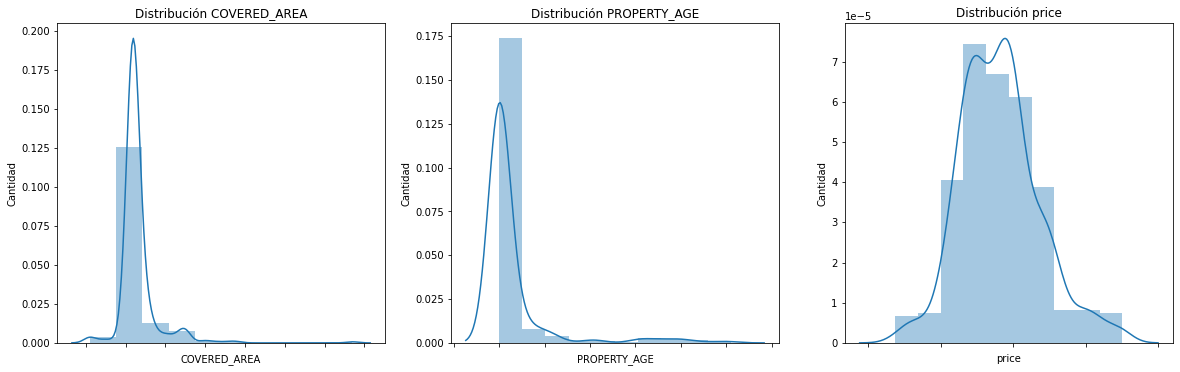

In [58]:

plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = cocheras[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Los gráficos representados muestran que la distribución del precio de las cocheras y el área cubierta pueden considerarse distribuciones normales, con mayor dispersión en el caso del precio.

Por otro lado, la distribución de la antigüedad es marcadamente asimétrica, presentándose mayor concentración en aquellas unidades más nuevas (en particular, 2 años de antigüedad).

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

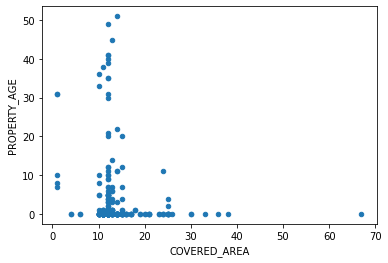

In [59]:
cocheras.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

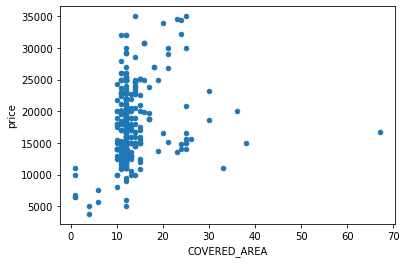

In [60]:
cocheras.plot.scatter('COVERED_AREA','price')

Los gráficos de dispersión no muestran una relación lineal entre las variables que representan área cubierta y antigüedad, como tampoco entre área cubierta y precio.

Aparentemente, las cocheras presentan un cierto valor por el solo hecho de su funcionalidad, sin importar cuán nuevas o grandes resultan (dentro del tamaño anteriormente establecido). 

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

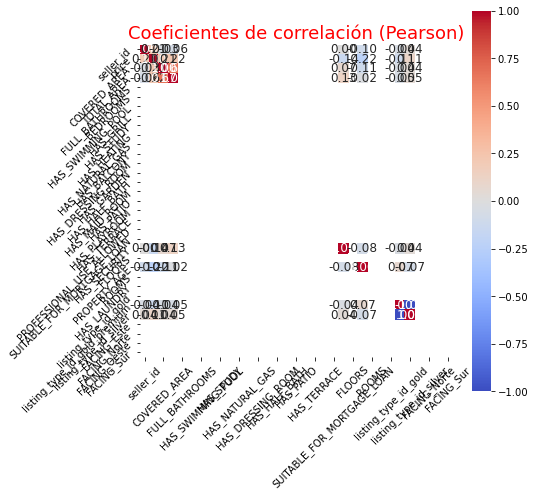

In [61]:
corr = cocheras.corr()

plt.figure(figsize = (7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "r")

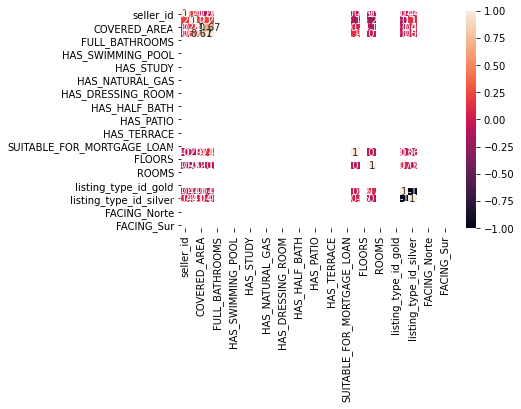

In [62]:
correlation_mat = cocheras.corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [63]:
corr_df = cocheras.corr()
#cocheras[['COVERED_AREA', 'PROPERTY_AGE', 'price']].describe().T
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                              seller_id     price  COVERED_AREA  TOTAL_AREA  \
seller_id                      1.000000  0.214669     -0.028256   -0.062425   
price                          0.214669  1.000000      0.212794    0.221990   
COVERED_AREA                  -0.028256  0.212794      1.000000    0.669335   
TOTAL_AREA                    -0.062425  0.221990      0.669335    1.000000   
FULL_BATHROOMS                      NaN       NaN           NaN         NaN   
BEDROOMS                            NaN       NaN           NaN         NaN   
HAS_SWIMMING_POOL                   NaN       NaN           NaN         NaN   
HAS_GRILL                           NaN       NaN           NaN         NaN   
HAS_STUDY                           NaN       NaN           NaN         NaN   
HAS_HEATING                         NaN       NaN           NaN         NaN   
HAS_NATURAL_GAS                     NaN       NaN           NaN         NaN   
HAS_BALCONY           

# EDA exclusivo para casas

In [64]:
casas=data2[data2.category_id.eq("MLA401685")]

In [65]:
casas.head()

In [66]:
casas[['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,835.0,175.735329,101.324469,26.0,105.0,150.0,205.5,732.0
TOTAL_AREA,835.0,364.265868,365.616009,26.0,144.5,220.0,400.0,2080.0
PROPERTY_AGE,835.0,25.003593,21.109143,0.0,7.0,20.0,40.0,100.0
price,835.0,222400.577246,180155.918688,20000.0,99750.0,165000.0,280000.0,1250000.0


En el caso de Casas se observó que, en promedio, el precio de venta es superior a los USD 200.000. Hay casas que se venden a USD 2.000, mientras que otras mostraron un precio superior a USD 1.000.000. Por otro lado, mientras que el promedio del área de cobertura resultó cercano a los 200m2, la mitad de las casas presentó un área de cobertura cercano a los 150 m2.
Respecto a la antigüedad, el 50% de las propiedades tienen 25 años de antigüedad, pero se ha encontrado casas de mas de 40 años de antigüedad en el cuartil superior.

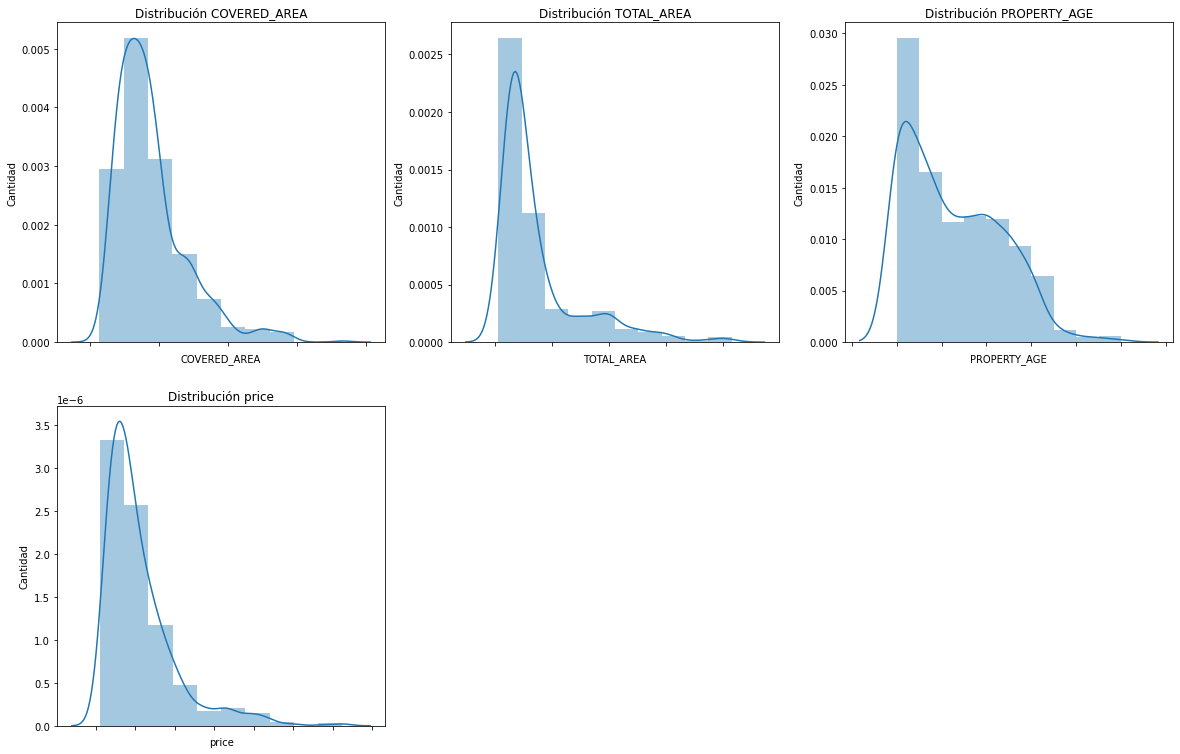

In [67]:
plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = casas[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Las distribuciones en Casas presentaron comportamientos diferentes respecto a las Cocheras. Todas las variables cuantitativas analizadas mostraron distribuciones sesgadas hacia la derecha.

<AxesSubplot:xlabel='COVERED_AREA', ylabel='TOTAL_AREA'>

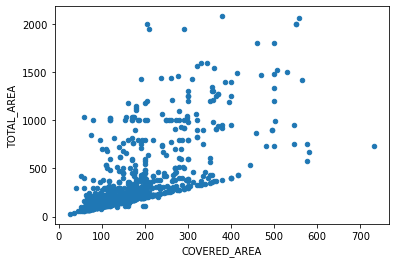

In [68]:
casas.plot.scatter('COVERED_AREA','TOTAL_AREA')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

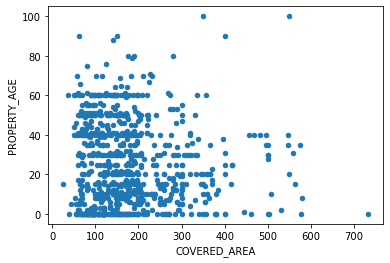

In [69]:
casas.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

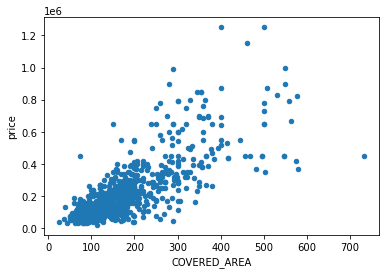

In [70]:
casas.plot.scatter('COVERED_AREA','price')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='PROPERTY_AGE'>

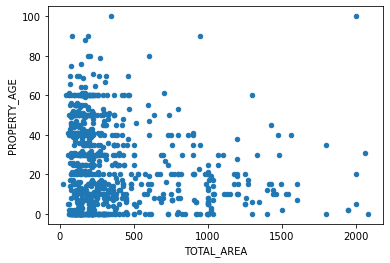

In [71]:
casas.plot.scatter('TOTAL_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='price'>

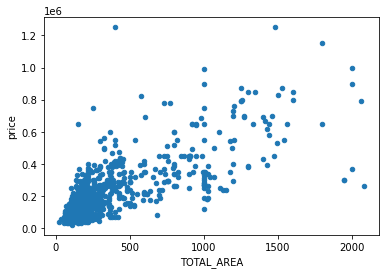

In [72]:
casas.plot.scatter('TOTAL_AREA','price')

<AxesSubplot:xlabel='PROPERTY_AGE', ylabel='price'>

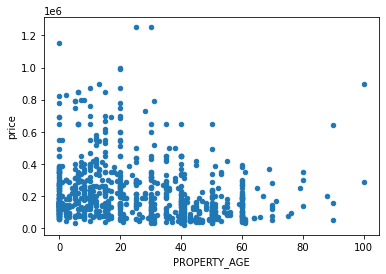

In [73]:
casas.plot.scatter('PROPERTY_AGE','price')

De los gráficos de dispersión bivariados se observó que, a diferencia de Cocheras, la superficie, es decir, tanto el área cubierta como el área total, presentaron una relación lineal respecto al precio. 

Entre área cubierta, o área total, y antigüedad, no se observó una relación lineal.

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

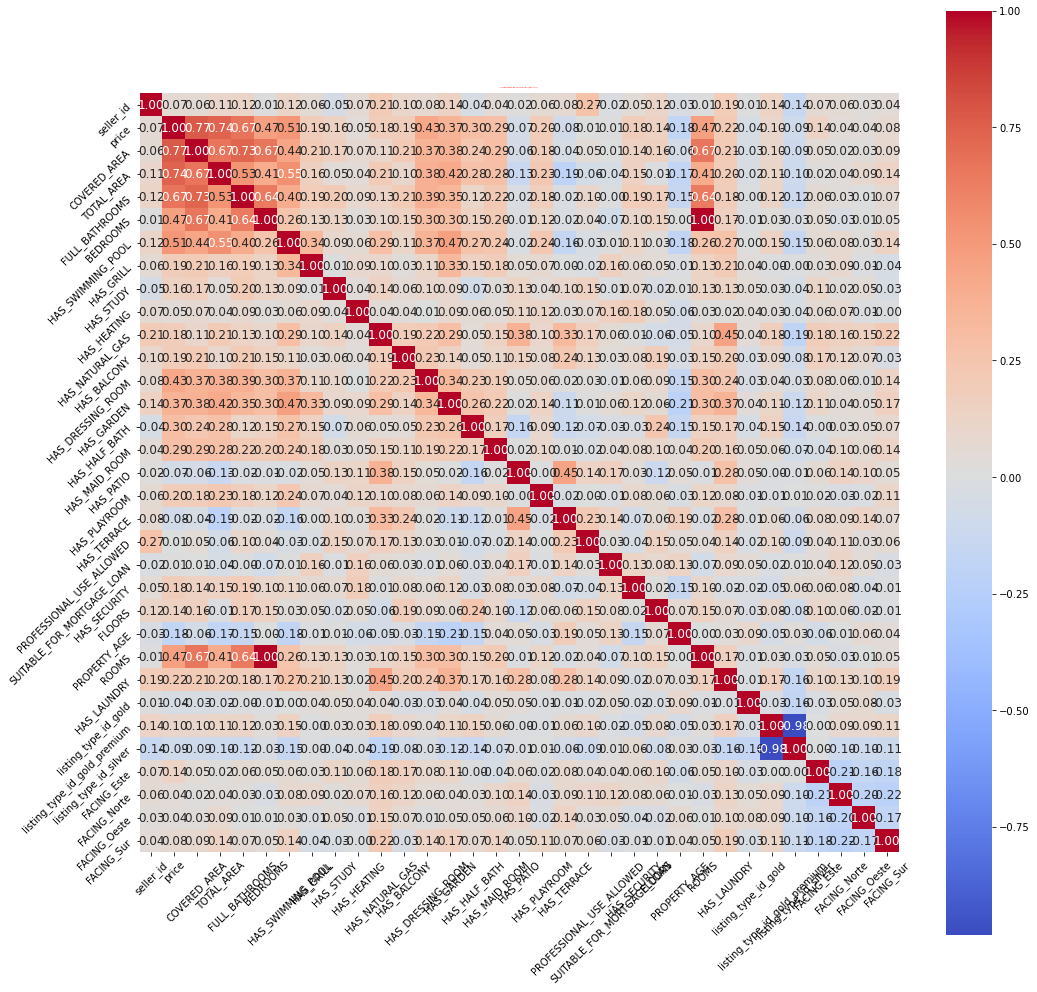

In [74]:
corr = casas.corr()

plt.figure(figsize = (17,17))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 2, color = "r")

In [75]:
corr_df = casas.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                              seller_id     price  COVERED_AREA  TOTAL_AREA  \
seller_id                      1.000000  0.069055      0.058480    0.107161   
price                          0.069055  1.000000      0.768952    0.738356   
COVERED_AREA                   0.058480  0.768952      1.000000    0.667207   
TOTAL_AREA                     0.107161  0.738356      0.667207    1.000000   
FULL_BATHROOMS                 0.119826  0.667252      0.733145    0.534387   
BEDROOMS                       0.011802  0.470912      0.666585    0.408178   
HAS_SWIMMING_POOL              0.124527  0.512865      0.443421    0.550158   
HAS_GRILL                      0.062237  0.186862      0.207778    0.158993   
HAS_STUDY                     -0.047928  0.156135      0.166458    0.047823   
HAS_HEATING                    0.067131  0.045370      0.072516    0.044145   
HAS_NATURAL_GAS                0.210150  0.184862      0.106633    0.207720   
HAS_BALCONY           

In [ ]:
comodidades_casas = pd.concat([casas['HAS_SWIMMING_POOL'].value_counts(normalize=True).mul(100),
                                casas['HAS_GRILL'].value_counts(normalize=True).mul(100),
                                casas['HAS_NATURAL_GAS'].value_counts(normalize=True).mul(100),
                                casas['HAS_BALCONY'].value_counts(normalize=True).mul(100),
                                casas['HAS_DRESSING_ROOM'].value_counts(normalize=True).mul(100),
                                casas['HAS_GARDEN'].value_counts(normalize=True).mul(100),
                                casas['HAS_TERRACE'].value_counts(normalize=True).mul(100),
                                casas['HAS_SECURITY'].value_counts(normalize=True).mul(100),
                                casas['HAS_LAUNDRY'].value_counts(normalize=True).mul(100)],
                                axis=1,keys=('Posee Pileta','Posee Parrilla',
                                    'Posee Gas Natural', 'Posee Balcón',
                                    'Posee Vestidor', 'Posee Jardín',
                                    'Posee Terraza', 'Posee Seguridad',
                                    'Posee Lavadero'))

comodidades_casas

Respecto a las características de las Casas, un porcentaje levemente superior al 20% poseen pileta,  parrilla y balcón. La mayoría posee gas natural (80%), mientras que menos de un quinto de las casas poseen vestidor. Alrededor de un tercio posee jardín, la mitad terraza, dos tercios lavadero, y un porcentaje muy bajo seguridad (alrededor del 3%). 

# EDA Exclusivo para departamentos

In [76]:
deptos= data2[data2.category_id.eq("MLA401686")]

In [78]:
deptos.head()

,id,title,seller_id,category_id,price,currency_id,start_time,stop_time,condition,permalink,...,PROPERTY_AGE,ROOMS,HAS_LAUNDRY,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_silver,FACING_Este,FACING_Norte,FACING_Oeste,FACING_Sur
0,MLA924306381,Excelente Mono C/ Balcon Y Terraza Exclusiva A...,267260119,MLA401686,43500.0,USD,2021-06-07T14:46:06.000Z,2021-10-18T01:16:52.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,0.0,0.0,0,0,1,0,0,0,0
2,MLA927945268,Departamento - Centro,7419762,MLA401686,70000.0,USD,2021-07-01T20:17:33.000Z,2021-10-21T04:00:00.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,1.0,0.0,0,0,1,0,0,1,0
3,MLA923470250,Venta · Departamento · 1 Dormitorio · A Estren...,296925437,MLA401686,60000.0,USD,2021-06-01T21:19:54.000Z,2022-01-25T05:16:01.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,1.0,0.0,0,0,1,0,0,1,0
5,MLA931475692,Italia 519,463239451,MLA401686,135000.0,USD,2021-07-29T12:42:54.000Z,2021-08-29T04:00:00.000Z,new,https://departamento.mercadolibre.com.ar/MLA-9...,...,0.0,2.0,1.0,0,0,1,0,0,0,0
6,MLA925840318,Venta Depto. A Estrenar Balcón Al Frente,233543779,MLA401686,73500.0,USD,2021-06-16T15:52:44.000Z,2021-08-17T11:15:55.000Z,used,https://departamento.mercadolibre.com.ar/MLA-9...,...,5.0,1.0,0.0,0,0,1,0,0,0,0


In [79]:
deptos[['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
COVERED_AREA,5006.0,59.784976,36.915922,2.0,36.0,47.0,72.0,382.0
TOTAL_AREA,5006.0,67.989197,42.794091,19.0,40.0,54.0,79.0,382.0
PROPERTY_AGE,5006.0,5.348881,12.786317,0.0,0.0,0.0,2.0,100.0
price,5006.0,122772.034559,131001.252728,19000.0,57000.0,77500.0,125000.0,1850000.0


En este tipo de inmueble se observó que, en promedio, el precio de venta no superó a los USD 130.000. Hay departamentos que se publicaron a menos de USD 20.000, mientras que otros mostraron un precio superior al USD 1.000.000. Por otro lado, en promedio el área de cobertura resultó de 60 m2, mientras que la mitad de las casas tienen un área de cobertura cercano a los 50 m2. Respecto a la antiguedad, en promedio, oscilaron alrededor de los 5 años.

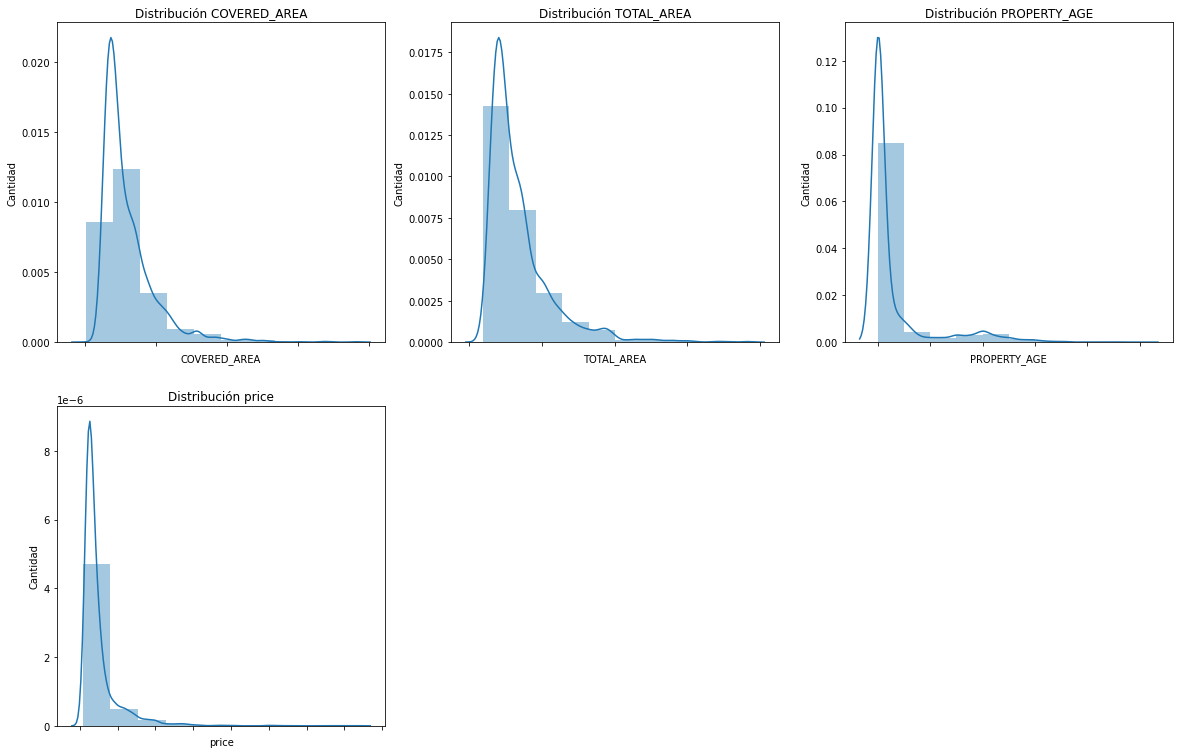

In [80]:
plt.figure(figsize=(20,20))
vars_to_plot = ['COVERED_AREA', 'TOTAL_AREA', 'PROPERTY_AGE','price']

for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1) 
    value_counts = deptos[var]
    ax=sns.distplot(value_counts,bins=10)
    title_string = "Distribución " + var
    plt.ylabel("Cantidad")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Las distribuciones del área de cobertura y área total de los departamentos presentaron un comportamiento muy similar al de las casas, mientras que la distribución de la antigüedad no. En los departamentos, la asimetría que se observó en esta última fué mayor.

Respecto al precio, también la distribución resultó más marcada.

<AxesSubplot:xlabel='COVERED_AREA', ylabel='TOTAL_AREA'>

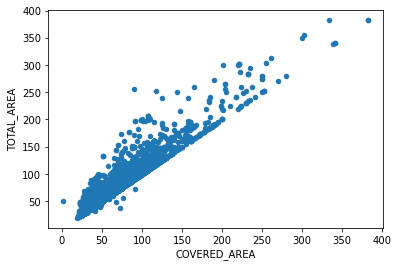

In [81]:
deptos.plot.scatter('COVERED_AREA','TOTAL_AREA')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='PROPERTY_AGE'>

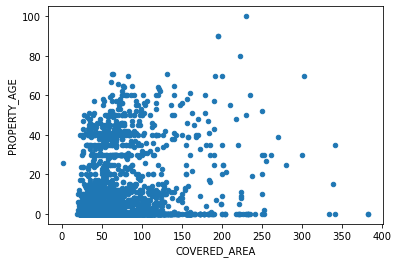

In [82]:
deptos.plot.scatter('COVERED_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='COVERED_AREA', ylabel='price'>

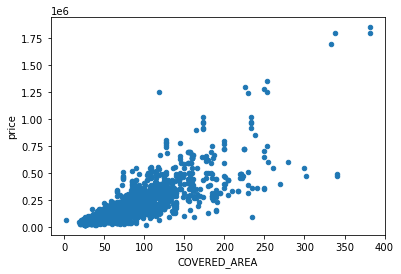

In [83]:
deptos.plot.scatter('COVERED_AREA','price')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='PROPERTY_AGE'>

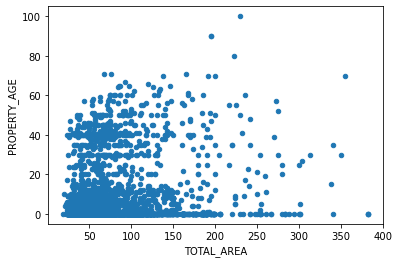

In [84]:
deptos.plot.scatter('TOTAL_AREA','PROPERTY_AGE')

<AxesSubplot:xlabel='TOTAL_AREA', ylabel='price'>

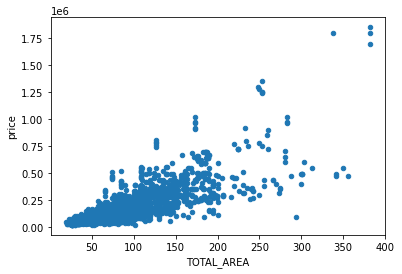

In [85]:
deptos.plot.scatter('TOTAL_AREA','price')

<AxesSubplot:xlabel='PROPERTY_AGE', ylabel='price'>

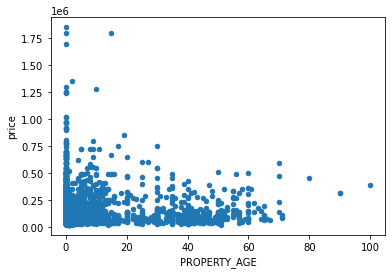

In [86]:
deptos.plot.scatter('PROPERTY_AGE','price')

Los gráficos de dispersión mostraron el mismo comportamiento que en el caso de las Casas. Se observaron patrones lineales entre el área cubierta, o área total, respecto al precio.

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

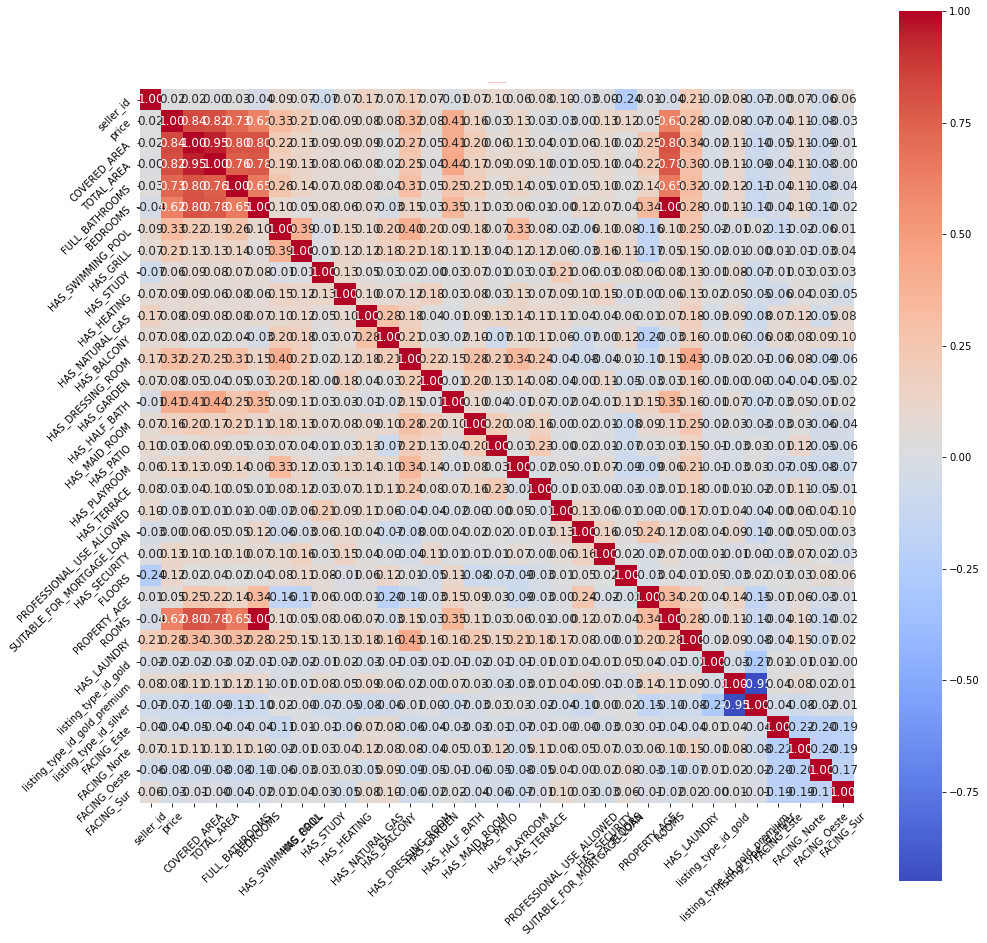

In [87]:
corr = deptos.corr()

plt.figure(figsize = (16,16))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 1, color = "r")

In [88]:
corr_df = deptos.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                              seller_id     price  COVERED_AREA  TOTAL_AREA  \
seller_id                      1.000000  0.016417      0.017819    0.003300   
price                          0.016417  1.000000      0.835813    0.819922   
COVERED_AREA                   0.017819  0.835813      1.000000    0.953452   
TOTAL_AREA                     0.003300  0.819922      0.953452    1.000000   
FULL_BATHROOMS                 0.034550  0.733294      0.798663    0.763553   
BEDROOMS                      -0.037890  0.621287      0.802860    0.784354   
HAS_SWIMMING_POOL              0.091489  0.327353      0.218234    0.192026   
HAS_GRILL                      0.069291  0.210968      0.131468    0.134039   
HAS_STUDY                     -0.067300  0.059839      0.090594    0.083741   
HAS_HEATING                    0.069739  0.090136      0.086019    0.064185   
HAS_NATURAL_GAS                0.165445  0.075686      0.092001    0.083907   
HAS_BALCONY           

In [89]:
Amenities_deptos = pd.concat([deptos['HAS_SWIMMING_POOL'].value_counts(normalize=True).mul(100),
                        deptos['HAS_GRILL'].value_counts(normalize=True).mul(100),
                        deptos['HAS_NATURAL_GAS'].value_counts(normalize=True).mul(100),
                        deptos['HAS_BALCONY'].value_counts(normalize=True).mul(100),
                        deptos['HAS_DRESSING_ROOM'].value_counts(normalize=True).mul(100),
                        deptos['HAS_GARDEN'].value_counts(normalize=True).mul(100),
                        deptos['HAS_TERRACE'].value_counts(normalize=True).mul(100),
                        deptos['HAS_SECURITY'].value_counts(normalize=True).mul(100),
                        deptos['HAS_LAUNDRY'].value_counts(normalize=True).mul(100)],
                        axis=1,keys=('Posee Pileta','Posee Parrilla',
                            'Posee Gas Natural', 'Posee Balcón',
                            'Posee Vestidor', 'Posee Jardín',
                            'Posee Terraza', 'Posee Seguridad',
                            'Posee Lavadero'))

Amenities_deptos

,Posee Pileta,Posee Parrilla,Posee Gas Natural,Posee Balcón,Posee Vestidor,Posee Jardín,Posee Terraza,Posee Seguridad,Posee Lavadero
0.0,76.468238,70.495406,30.003995,28.485817,85.976828,96.12465,82.201358,90.771075,70.055933
1.0,23.531762,29.504594,69.996005,71.514183,14.023172,3.87535,17.798642,9.228925,29.944067


Respecto a los amenities de los departamentos publicados, menos de un cuarto de los departamentos poseen pileta, mientras que una proporción levemente superior posee parrilla. Respecto al gas natural y al balcón, alrededor del 70% de los departamentos poseen ambas cualidades. Menos del 15% posee vestidor, mientras que un porcentaje cercano pero superior posee terraza. Una proporción ínfima (en torno al 3%) posee jardín, siendo esto lógico por tratarse de departamentos. Alrededor del 10% posee seguridad (pudiendo ser cámaras como vigilancia permanente), mientras que casi un tercio posee lavadero.

# Parte 3 - Construcción de un modelo predictivo para predecir el valor de venta de los inmuebles

Definido el dataset, y realizado un primer acercamiento al mismo a través de un análisis EDA sectorizado (según se trate de Casas, Departamentos o Cocheras), se procedió a la construcción de distintos modelos predictivos, a los fines de encontrar aquel que sea capaz de predecir, con la mayor exactitud posible, el precio de venta de los inmuebles.

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

## Departamentos

En primera instancia, se procedió a la modelización de inmuebles de tipo Departamentos. 

Para ello, se limpió el dataset, conservando sólo las variables numéricas.

In [92]:
def clean_dataset(deptos):
    assert isinstance(deptos, pd.DataFrame), 
    deptos.dropna(inplace=True)
    indices_to_keep = ~deptos.isin([np.nan, np.inf, -np.inf]).any(1)
    return deptos[indices_to_keep].astype(np.float64)

In [ ]:
seleccion = deptos.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccion.info()

Se estableció la variable a predecir (y), el precio de las propiedades, y las variables predictoras (las restantes numéricas, x<sub>i</sub>).

Posteriormente, se dividió el dataset entre train (80%) y test (20%). 

In [94]:
X = seleccion.iloc[:, 2:23].values
y = seleccion.iloc[:, 1].values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_test.shape)

(4004, 21)
(1002,)


### Regresion Lineal 

Para comenzar con el análisis propiamente dicho, se aplicó un modelo de regresión lineal múltiple. Si bien, teóricamente, deberían cumplirse una serie de supuestos para que esta técnica sea correctamente aplicada; por su simplicidad se entendió como una buena aproximación inicial al problema.

Además, teniendo en cuenta que el objetivo a abordar es un "problema de negocio" y no una cuestión meramente académica, la relevancia de la técnica a los fines del presente análisis radicó en la capacidad de predicción más que en el cumplimiento de los supuestos.

In [96]:
#Regresion Lineal Simple - Entrenamiento
from sklearn.linear_model import LinearRegression #Llamo el modelo
regressorRL = LinearRegression() #Creo el modelo
regressorRL.fit(X_train, y_train) #Entreno el modelo

# Regresión Lineal - Validación test set
y_pred_RL = regressorRL.predict(X_test)

# Regresión Lineal - Accuaracy
from sklearn.metrics import r2_score
print('R2 para Regresión Lineal:')
R2RL = r2_score(y_test, y_pred_RL)
print(R2RL)
predicciones=pd.DataFrame(y_test, y_pred_RL)

from math import sqrt
#Regresión Lineal - medidas de error
RMSE_RL= sqrt(np.mean((y_test - y_pred_RL)**2))
mae_RL= np.mean(abs(y_pred_RL - y_test))
MAPE_RL = np.mean((abs(y_test - y_pred_RL))/y_test)
SMAPE_RL = sum(abs(y_test - y_pred_RL))/sum(y_test + y_pred_RL)

RL = [R2RL,RMSE_RL,mae_RL,MAPE_RL,SMAPE_RL]
print(RL)

R2 para Regresión Lineal:
0.7330297188375452
[0.7330297188375452, 58551.92368528311, 35002.040404543695, 0.33779044058924135, 0.14869381983693125]


Los resultados indican que el R2 (coeficiente de determinación) para los departamentos resultó superior al 70%. Esto significa que más del 70% de la varianza total fue explicada por el modelo de regresión.

### Gradient Boosting Machine

En segunda instancia, se utilizó el algoritmo de Gradient Boosting Machine, aplicando la técnica de árboles de decisión. 

Las principales ventajas se relacionan con que son capaces de seleccionar predictores de forma automática, pueden aplicarse a problemas de regresión y clasificación, y manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding (en la práctica, esto último depende de la implementación del algoritmo que tenga cada librería).

Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización), a la vez que tampoco se ven muy influenciados por outliers.

Son muy útiles en la exploración de datos, ya que permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

Finalmente, cabe mencionar que tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.

In [97]:
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

predictionsGB = gradient_boosted.predict(X_test)

print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]

R2 para Gradient Boosting Machine:
0.8557547729099098


En principio, el R<sub>2</sub> pareciera ser alentador. Se efectuó una validación cruzada con 10 grupos aleatorios,

In [98]:
from sklearn.model_selection import KFold,cross_val_score
scores = cross_val_score(gradient_boosted, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Varianza scores Gardient Boosting: {:.2f}".format(np.var(scores)))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.85359771 0.79266284 0.90340406 0.81073379 0.60225939 0.88331585
 0.84383918 0.84193109 0.77742819 0.89536681]
Varianza scores Gardient Boosting: 0.01
Average cross-validation score: 0.82


Se obtuvieron los parámetros por default del modelo,

In [99]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

grid search para los mejores parámetros de nuestro modelo

In [100]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingRegressor()
parametros = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 6, 9],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#Ejecución del Grid Search con el modelo y los parámetros definidos
r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)

print(grid_res.best_score_)

0.8544025951577232


In [101]:
print("Los mejores parámetros para gradient boosting son:")
print(grid_res.best_params_)

Los mejores parámetros para gradient boosting son:
{'learning_rate': 0.1, 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 300}


#Los mejores parámetros para gradient boosting son:
#{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}

In [102]:
#Redefinir Hiperparametros.
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

#Gradient Bostin Machine
predictionsGB = gradient_boosted.predict(X_test)

# Gradient Bostin Machine
print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

# Gradient Bost Machine
RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]

R2 para Gradient Boosting Machine:
0.8546275682872455


In [103]:
a = seleccion.columns
a = list(a)

In [104]:
b=a[2:25] # hacer un view y controlar que estén bien las columnas que toma

In [105]:
#Selección de caracteristicas para el mejor modelo de Gradient Boosting Machine encontrado
for name, importance in zip(b, gradient_boosted.feature_importances_):
    print(name, "=", importance)

COVERED_AREA = 0.5170099524592707
TOTAL_AREA = 0.32486492941143896
FULL_BATHROOMS = 0.03760326729423494
BEDROOMS = 0.008597502456751425
HAS_SWIMMING_POOL = 0.04684677617009044
HAS_GRILL = 0.002577480310867513
HAS_STUDY = 0.00011342689965546293
HAS_HEATING = 0.0019941348420414603
HAS_NATURAL_GAS = 0.001471274812653728
HAS_BALCONY = 0.0007433449369249911
HAS_DRESSING_ROOM = 0.009022235102318159
HAS_GARDEN = 0.0004329970580880158
HAS_HALF_BATH = 0.004863247362083893
HAS_MAID_ROOM = 0.0
HAS_PATIO = 0.004374450437284919
HAS_PLAYROOM = 0.0022976369511720257
HAS_TERRACE = 0.0015246037712084164
PROFESSIONAL_USE_ALLOWED = 0.0009006362807665581
SUITABLE_FOR_MORTGAGE_LOAN = 0.00015269262553234677
HAS_SECURITY = 0.0011569502727581586
FLOORS = 0.03345246054485803


In [106]:
X = seleccion.iloc[:, 2:23].values
y = seleccion.iloc[:, 1].values

In [107]:
 # Random Forest

In [108]:
#Random Forest - entrenamiento
from sklearn.ensemble import RandomForestRegressor #Llamo el modelo
regressorRF = RandomForestRegressor(n_estimators = 10, random_state = 0) #Creo el modelo
regressorRF.fit(X_train, y_train) #Entreno el modelo

# Random Forest - validaciones
y_pred_RF= regressorRF.predict(X_test)

#Ramdom Forest - accuaracy
print('R2 para Random Forest:')
R2RF=r2_score(y_test, y_pred_RF)
print(R2RF)

# Random Forest - medidas de error
RMSE_RF= sqrt(np.mean((y_test - y_pred_RF)**2))
mae_RF= np.mean(abs(y_pred_RF - y_test))
MAPE_RF = np.mean((abs(y_test - y_pred_RF))/y_test)
SMAPE_RF = sum(abs(y_test - y_pred_RF))/sum(y_test + y_pred_RF)

RF = [R2RF,RMSE_RF, mae_RF,MAPE_RF,SMAPE_RF]

R2 para Random Forest:
0.8707165054373898


In [111]:
regressorRF2.feature_importances_

NameError: name 'regressorRF2' is not defined

In [112]:
#Selección de caracteristicas para el mejor modelo de random forest encontrado
for name, importance in zip(b, regressorRF2.feature_importances_):
    print(name, "=", importance)

NameError: name 'regressorRF2' is not defined

In [113]:
total = [RL, RF, GB]
index =["Regresión Lineal", "Random Forest", "Gradient Bosting Machine"]
cols = ["R2", "RMSE", "MAE", "MAPE", "SMAPE"]
MedError= pd.DataFrame(total, columns=cols, index=index)
MedError

,R2,RMSE,MAE,MAPE,SMAPE
Regresión Lineal,0.733030,58551.923685,35002.040405,0.337790,0.148694
Random Forest,0.870717,40745.649969,20349.705865,0.183256,0.086124
Gradient Bosting Machine,0.854628,43206.664065,23674.434310,0.210441,0.100405


## Casas

Al igual que para Departamentos, se procedió al desarrollo de distintos modelos para encontrar el que mejor prediga el precio para Casas. 

Para ello, se creó un dataset que contenga sólo las variables numéricas.

In [114]:
def clean_dataset(casas):
    assert isinstance(casas, pd.DataFrame), "df needs to be a pd.DataFrame"
    deptos.dropna(inplace=True)
    indices_to_keep = ~casas.isin([np.nan, np.inf, -np.inf]).any(1)
    return casas[indices_to_keep].astype(np.float64)

In [115]:
seleccion = casas.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 1 to 8310
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   seller_id                     835 non-null    int64  
 1   price                         835 non-null    float64
 2   COVERED_AREA                  835 non-null    float64
 3   TOTAL_AREA                    835 non-null    float64
 4   FULL_BATHROOMS                835 non-null    float64
 5   BEDROOMS                      835 non-null    float64
 6   HAS_SWIMMING_POOL             835 non-null    float64
 7   HAS_GRILL                     835 non-null    float64
 8   HAS_STUDY                     835 non-null    float64
 9   HAS_HEATING                   835 non-null    float64
 10  HAS_NATURAL_GAS               835 non-null    float64
 11  HAS_BALCONY                   835 non-null    float64
 12  HAS_DRESSING_ROOM             835 non-null    float64
 13  HAS_

Dado que la variable "Floors" tiene valores faltanes, se hace una imputación

In [116]:
casas['FLOORS'] = casas['FLOORS'].fillna(casas['FLOORS'].mean())

In [117]:
seleccion = casas.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32","uint8", "float64"])
seleccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 1 to 8310
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   seller_id                     835 non-null    int64  
 1   price                         835 non-null    float64
 2   COVERED_AREA                  835 non-null    float64
 3   TOTAL_AREA                    835 non-null    float64
 4   FULL_BATHROOMS                835 non-null    float64
 5   BEDROOMS                      835 non-null    float64
 6   HAS_SWIMMING_POOL             835 non-null    float64
 7   HAS_GRILL                     835 non-null    float64
 8   HAS_STUDY                     835 non-null    float64
 9   HAS_HEATING                   835 non-null    float64
 10  HAS_NATURAL_GAS               835 non-null    float64
 11  HAS_BALCONY                   835 non-null    float64
 12  HAS_DRESSING_ROOM             835 non-null    float64
 13  HAS_

Se procedió a la división del dataset entre las variables a predecir y las predictoras, y posteriormente se estableció un 80% del dataset para train y un 20% del mismo para test.

In [118]:
X = seleccion.iloc[:, 2:23].values
y = seleccion.iloc[:, 1].values

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_test.shape)

(668, 21)
(167,)


### Regresion Lineal

In [120]:
#Regresion Lineal Simple - Entrenamiento
from sklearn.linear_model import LinearRegression #Llamo el modelo
regressorRL = LinearRegression() #Creo el modelo
regressorRL.fit(X_train, y_train) #Entreno el modelo

# Regresión Lineal - Validación test set
y_pred_RL = regressorRL.predict(X_test)

# Regresión Lineal - Accuaracy
from sklearn.metrics import r2_score
print('R2 para Regresión Lineal:')
R2RL = r2_score(y_test, y_pred_RL)
print(R2RL)
predicciones=pd.DataFrame(y_test, y_pred_RL)

from math import sqrt
#Regresión Lineal - medidas de error
RMSE_RL= sqrt(np.mean((y_test - y_pred_RL)**2))
mae_RL= np.mean(abs(y_pred_RL - y_test))
MAPE_RL = np.mean((abs(y_test - y_pred_RL))/y_test)
SMAPE_RL = sum(abs(y_test - y_pred_RL))/sum(y_test + y_pred_RL)

RL = [R2RL,RMSE_RL,mae_RL,MAPE_RL,SMAPE_RL]
print(RL)

R2 para Regresión Lineal:
0.7040047942323522
[0.7040047942323522, 106786.92815162441, 69839.37811526567, 0.4122823706728207, 0.1551371092784924]


In [121]:
#Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

#Gradient Boosting Machine
predictionsGB = gradient_boosted.predict(X_test)

# Gradient Boosting Machine
print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

# Gradient Boosting Machine
RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]

R2 para Gradient Boosting Machine:
0.6883949172390498


In [122]:
#Validación cruzada para 10 grupos aleatorios de datos gradient boosting
from sklearn.model_selection import KFold,cross_val_score
scores = cross_val_score(gradient_boosted, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Varianza scores Gardient Boosting: {:.2f}".format(np.var(scores)))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.6018879  0.69314011 0.71201036 0.759464   0.67648579 0.70269806
 0.79430156 0.65840013 0.78078919 0.53765848]
Varianza scores Gardient Boosting: 0.01
Average cross-validation score: 0.69


In [123]:
#Obtener los parámetros por default del modelo
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Se define el modelo y los parámetros a revisar
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingRegressor()
parametros = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 6, 9],
    'max_features': [0, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 1000]
}

#Ejecución del Grid Search con el modelo y los parámetros definidos
r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)

print(grid_res.best_score_)

In [ ]:
print("Los mejores parámetros para gradient boosting son:")
print(grid_res.best_params_)

In [ ]:
#Los mejores parámetros para gradient boosting son:
#{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}

In [ ]:
#Redefinir Hiperparametros.
from sklearn.ensemble import GradientBoostingRegressor #Llamo el modelo
gradient_boosted = GradientBoostingRegressor() #Creo el modelo
gradient_boosted.fit(X_train, y_train) #Entreno el modelo

#Gradient Bostin Machine
predictionsGB = gradient_boosted.predict(X_test)

# Gradient Bostin Machine
print('R2 para Gradient Boosting Machine:')
R2GB= r2_score(y_test, predictionsGB) 
print(R2GB)

# Gradient Bost Machine
RMSE_GB= sqrt(np.mean((y_test - predictionsGB)**2))
mae_GB= np.mean(abs(predictionsGB - y_test))
MAPE_GB = np.mean((abs(y_test - predictionsGB))/y_test)
SMAPE_GB = sum(abs(y_test - predictionsGB))/sum(y_test + predictionsGB)

GB = [R2GB,RMSE_GB,mae_GB,MAPE_GB,SMAPE_GB]

In [ ]:
a = seleccion.columns
a = list(a)

In [ ]:
b=a[2:25]

In [ ]:
#Selección de caracteristicas para el mejor modelo de Gradient Boosting Machine encontrado
for name, importance in zip(b, gradient_boosted.feature_importances_):
    print(name, "=", importance)

In [ ]:
X = seleccion.iloc[:, 2:23].values
y = seleccion.iloc[:, 1].values

In [ ]:
# Random Forest

In [ ]:
#Random Forest - entrenamiento
from sklearn.ensemble import RandomForestRegressor #Llamo el modelo
regressorRF = RandomForestRegressor(n_estimators = 10, random_state = 0) #Creo el modelo
regressorRF.fit(X_train, y_train) #Entreno el modelo

# Random Forest - validaciones
y_pred_RF= regressorRF.predict(X_test)

#Ramdom Forest - accuaracy
print('R2 para Random Forest:')
R2RF=r2_score(y_test, y_pred_RF)
print(R2RF)

# Random Forest - medidas de error
RMSE_RF= sqrt(np.mean((y_test - y_pred_RF)**2))
mae_RF= np.mean(abs(y_pred_RF - y_test))
MAPE_RF = np.mean((abs(y_test - y_pred_RF))/y_test)
SMAPE_RF = sum(abs(y_test - y_pred_RF))/sum(y_test + y_pred_RF)

RF = [R2RF,RMSE_RF, mae_RF,MAPE_RF,SMAPE_RF]

In [ ]:
#Obtener lo parámetros por default del random forest
RandomForestRegressor().get_params()

In [ ]:
#Validación cruzada para 10 grupos aleatorios de datos random forest, mejor modelo
from sklearn.model_selection import KFold,cross_val_score
scoresRF = cross_val_score(regressorRF, X, y, cv=10)
print("Cross-validation scores Random Forest: {}".format(scoresRF))
print("Media Scores Random Forest: {:.2f}".format(scoresRF.mean()))
print("Varianza scores Random Forest: {:.2f}".format(np.var(scoresRF)))
print(RF)

In [ ]:
#Se define el modelo y los parámetros a revisar
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()
parametros = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#Ejecución del Grid Search con el modelo y los parámetros definidos
r2 = make_scorer(r2_score)
grid_res = GridSearchCV(clf, parametros, verbose=0, cv=10, scoring = r2, return_train_score=True)
grid_res.fit(X, y)

print(grid_res.best_score_)
print(grid_res.best_params_)

In [ ]:
#Random Forest - entrenamiento
from sklearn.ensemble import RandomForestRegressor #Llamo el modelo
regressorRF2 = RandomForestRegressor(bootstrap=True, 
                                     max_depth=100, 
                                     max_features=3, 
                                     min_samples_leaf=3, 
                                     min_samples_split=10, 
                                     n_estimators = 100) #Creo el modelo
regressorRF2.fit(X_train, y_train) #Entreno el modelo

# Random Forest - validaciones
y_pred_RF2= regressorRF2.predict(X_test)

#Ramdom Forest - accuaracy
print('R2 para Random Forest:')
#cambie esto vs el que estaba en el github
R2RF2=r2_score(y_test, y_pred_RF2)
print(R2RF2)

# Random Forest - medidas de error
RMSE_RF2= sqrt(np.mean((y_test - y_pred_RF2)**2))
mae_RF2= np.mean(abs(y_pred_RF2 - y_test))
MAPE_RF2 = np.mean((abs(y_test - y_pred_RF2))/y_test)
SMAPE_RF2 = sum(abs(y_test - y_pred_RF2))/sum(y_test + y_pred_RF2)

RF = [R2RF2,RMSE_RF2, mae_RF2,MAPE_RF2,SMAPE_RF2]

In [ ]:
regressorRF2.feature_importances_

In [ ]:
#Selección de caracteristicas para el mejor modelo de random forest encontrado
for name, importance in zip(b, regressorRF2.feature_importances_):
    print(name, "=", importance)

In [ ]:
total = [RL, RF, GB]
index =["Regresión Lineal", "Random Forest", "Gradient Bosting Machine"]
cols = ["R2", "RMSE", "MAE", "MAPE", "SMAPE"]
MedError= pd.DataFrame(total, columns=cols, index=index)
MedError